In [1]:
from scipy.optimize import differential_evolution
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
plt.style.use('seaborn-deep')
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
from models import PARAMS, Zhao_2021, Mg_M, run, initial_conditions, reset
from calibration import cost_function_study
print('Mg {} Mg_e {}'.format(Mg_M['Mg_e'],Mg_M['Mg']))
%config Completer.use_jedi = False
showOriginalModelString = True
# load the samples from the original model
from observations import observations
class GSs:
    graph_size = [5,5]
    colors = ['lime' , 'violet', 'yellowgreen', 'peru', 'skyblue']
    legend_font_size = 30
    tick_font_size = 30
    title_font_size = 30
#// read the inferred values and divide it to the given groups 
with open('inferred_params.json') as file:
    inferred_params = json.load(file)
# inferred_params['k301_1']=.2
inferred_params_model = {}
hyperparams = {}
for key in PARAMS.free_params_model.keys():
    inferred_params_model[key] = inferred_params[key]
for key in PARAMS.hyperparams.keys():
    hyperparams[key] = inferred_params[key]

{'k301_1': [0, 1], 'k301_2': [0, 1], 'Mg_copy': [0, 10000], 'k311': [0, 1], 'n300': [0, 10], 'TRPM': [0, 10000]}
Mg 800.0 Mg_e 800.0


ID Mg_.08 sim 0.9719151651740116 exp 1.1
ID Mg_.8 sim 1.0 exp 1
ID Mg_8 sim 1.824416392786594 exp 2.5


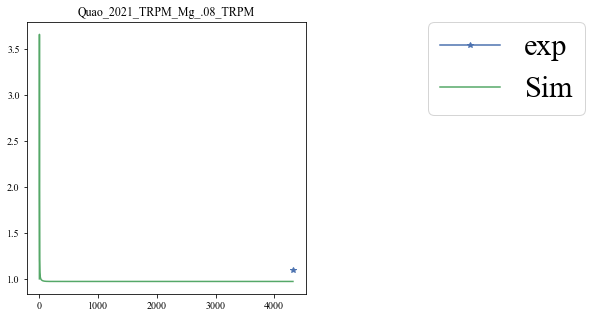

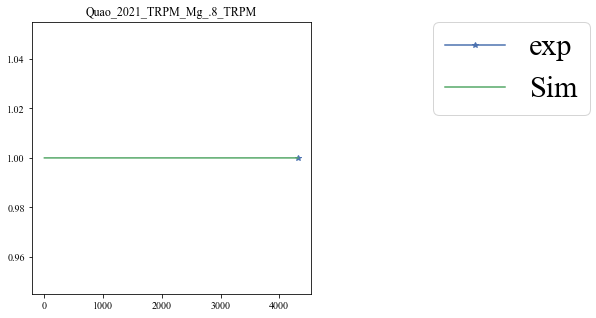

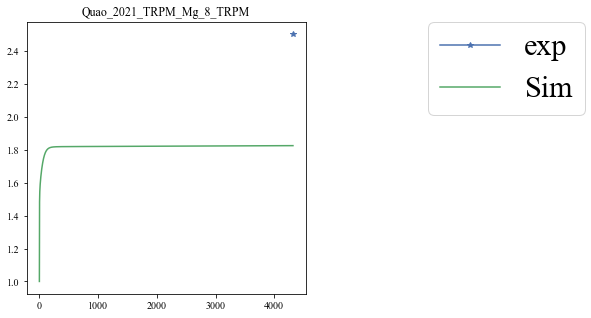

In [2]:
def reset(model,params = None): # resets the given model and also sets those that cannot be reset by default
    model.reset()
#     model['Mg_e_mM'] = 0.8
    if params == None:
        pass
    else:
        for key,value in params.items():
            model[key] = value
#// plot the simulation vs observations
for study in observations['studies']:
    study_observations = observations[study]
    measurement_scheme = study_observations['measurement_scheme']
    
    _, IDs_results = cost_function_study(study=study,free_params_model=inferred_params_model,
                                         hyperparams=hyperparams,select_sim = False)
    for ID, ID_results in IDs_results.items():
        ID_observations = study_observations[ID]['expectations']
#         print(ID_observations)
        for key in ID_observations.keys():
            exp = ID_observations[key]['mean'] # the whole array
#             print(key,ID_observations[key])
            sim = ID_results[key]
            print('ID {} sim {} exp {}'.format(ID,sim[-1],exp[-1]))
            
            fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
            fig.canvas.draw()
            ax = fig.add_subplot(1, 1, 1)
            ax.plot([i for i in measurement_scheme[key]],exp,label='exp',marker='*')
            ax.plot(range(len(sim)),sim,label='Sim')
            ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
            ax.set_title(study+'_'+ID+'_'+key)
            

1.4180229076229768e+16
1.3325517697790074e+16
2.587064238014269e+16


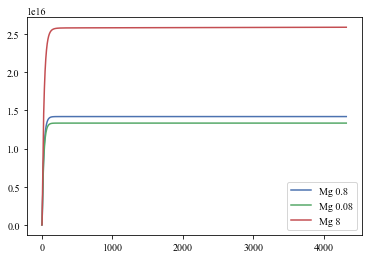

In [3]:
reset(Mg_M,inferred_params_model) #reset the model
## apply the boundary condition
Mg_M['Mg_e'] = .8*inferred_params_model['Mg_copy']
results = Mg_M.simulate(0,72*60,72*60,selections=['TIME','TRPM'])
plt.plot(results['TRPM'],label='Mg 0.8')
print(results['TRPM'][-1])

reset(Mg_M,inferred_params_model) #reset the model
## apply the boundary condition
Mg_M['Mg_e'] = .08*inferred_params_model['Mg_copy']
results = Mg_M.simulate(0,72*60,72*60,selections=['TIME','TRPM'])
plt.plot(results['TRPM'],label='Mg 0.08')
print(results['TRPM'][-1])

reset(Mg_M,inferred_params_model) #reset the model
## apply the boundary condition
Mg_M['Mg_e'] = 8*inferred_params_model['Mg_copy']
results = Mg_M.simulate(0,72*60,72*60,selections=['TIME','TRPM'])
plt.plot(results['TRPM'],label='Mg 8')
plt.legend()
print(results['TRPM'][-1])

No handles with labels found to put in legend.


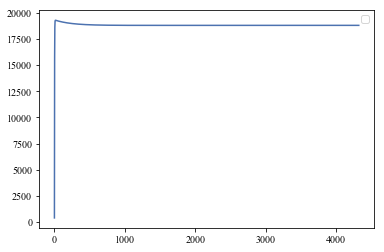

In [9]:
reset(Mg_M,inferred_params_model) #reset the model
## apply the boundary condition
Mg_M['Mg_e'] = 800*inferred_params_model['Mg_copy']
results = Mg_M.simulate(0,72*60,72*60,selections=['TIME','Mg'])
plt.plot(results['Mg'])
plt.legend()


In [5]:
if False:
    #** plotting vs Zhao
    #// update the Mg_M model by applying the inferred values
    reset(Mg_M,inferred_params_model)
    #// run the Mg_M model
    selections = ['TIME']+PARAMS.targets
    Mg_M_results = run(Mg_M,duration = PARAMS.duration,targets=selections)
    #// run the original model 
    Zhao_2021.reset()
    Zhao_results = run(Zhao_2021, duration =PARAMS.duration,targets=selections)
    for target in PARAMS.targets:
        fig = plt.figure(figsize=(GSs.graph_size[0],GSs.graph_size[1]))
        fig.canvas.draw()
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(Zhao_results['time'],Zhao_results[target],label='Zhao')
        ax.plot(Mg_M_results['time'],Mg_M_results[target],label='Mg_M')
        ax.legend(bbox_to_anchor=(2, 1),loc = 'upper right', borderaxespad=0.,prop={ 'family':'Times New Roman','size':GSs.legend_font_size},ncol=1)
